#**Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Import Important Libraries**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


#**Data Load**

In [3]:
data_path='/content/drive/MyDrive/data/Data Analyst/creditcard.csv'
df=pd.read_csv(data_path)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**EDA ANALYSIS**

In [33]:
#shape of data
df.shape

(284807, 31)

In [34]:
#Indo of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
#Cheking the columns of dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
df[['Class','Time','Amount']].describe()

,Class,Time,Amount
count,284807.000000,284807.000000,284807.000000
mean,0.001727,94813.859575,88.349619
std,0.041527,47488.145955,250.120109
min,0.000000,0.000000,0.000000
25%,0.000000,54201.500000,5.600000
50%,0.000000,84692.000000,22.000000
75%,0.000000,139320.500000,77.165000
max,1.000000,172792.000000,25691.160000


In [37]:
#Checking Null values(Column Wise)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
#checking fraud and notFraud class
notFraud=df[df['Class']==0]
fraud=df[df['Class']==1]


In [9]:
len(notFraud)

284315

In [10]:
len(fraud)

492

In [11]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

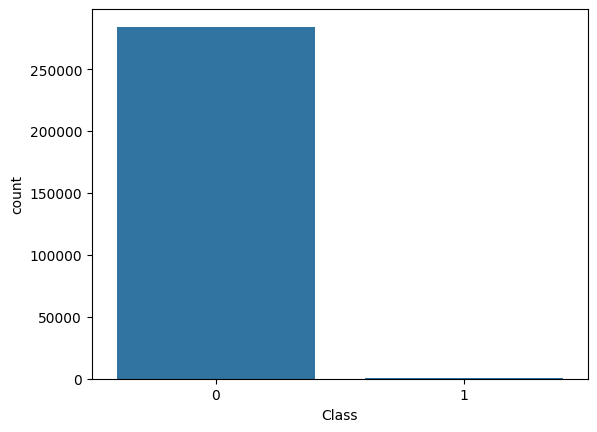

In [39]:
#Visualiztion of fraud and notFraud class
sns.countplot(x='Class',data=df)

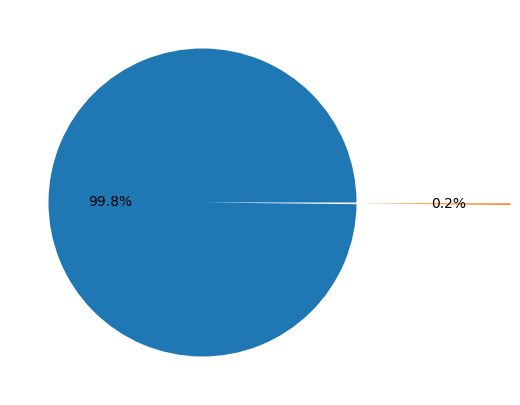

In [13]:
plt.figure(figsize=(5,5))
plt.pie(df['Class'].value_counts(),df['Class'].value_counts().keys(),autopct='%0.01f%%')
plt.show()

#**Train Test Split**

**The ration of training set and testing set is 80:20 and the stratify method is used for balance this imbalanced dataset**

In [16]:
x=df.drop(['Class'],axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=261)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))


Number of rows in the total set: 284807
Number of rows in the training set: 227845
Number of rows in the test set: 56962


In [19]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [20]:
y_test.value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

#**Model Pipeline**

In [22]:
def pipeline(learner_list, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    # Get length of Training Data:
    size = len(y_train)

    results = {}
    final_results = []

    for learner in learner_list:

        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # probaility of prediction
        y_score = learner.predict_proba(X_test)[:, 1]

        results['y_score_shape'] = y_score.shape

        # ROC curve plotting
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        roc_auc = roc_auc_score(y_test, y_score)

        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
        plt.show()

        results['roc_auc'] = roc_auc # ROC_AUC value

        # store fpr, tpr value
        results['fpr'] = fpr
        results['tpr'] = tpr


        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')

        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

Training DecisionTreeClassifier


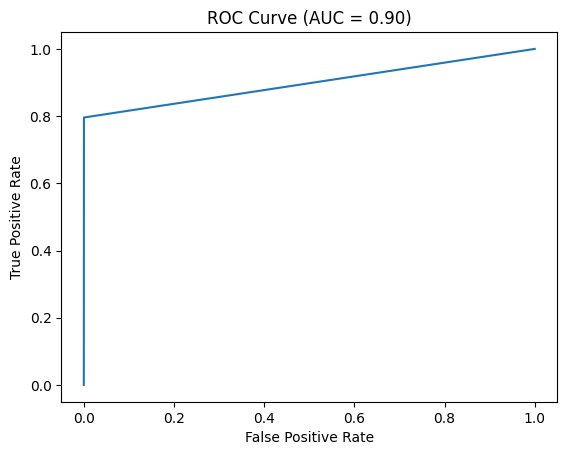

Training DecisionTreeClassifier finished in 19.36 sec
----------------------------------------------------
Training RandomForestClassifier


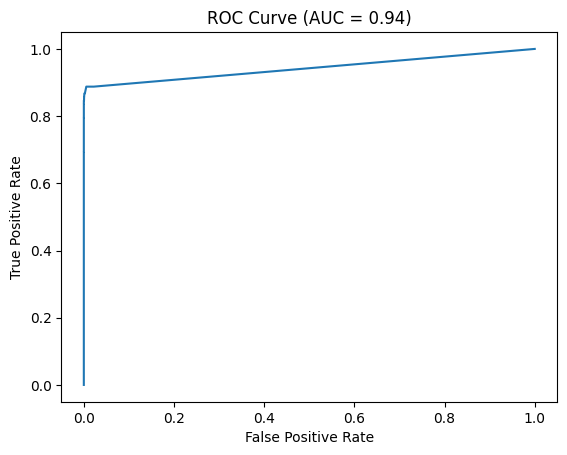

Training RandomForestClassifier finished in 213.27 sec
----------------------------------------------------
Training LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


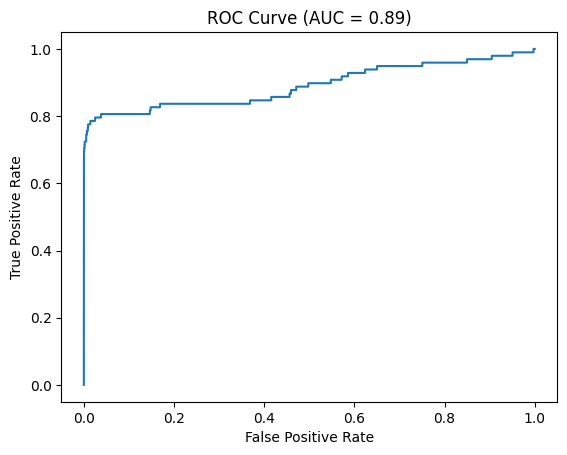

Training LogisticRegression finished in 4.08 sec
----------------------------------------------------
Training KNeighborsClassifier


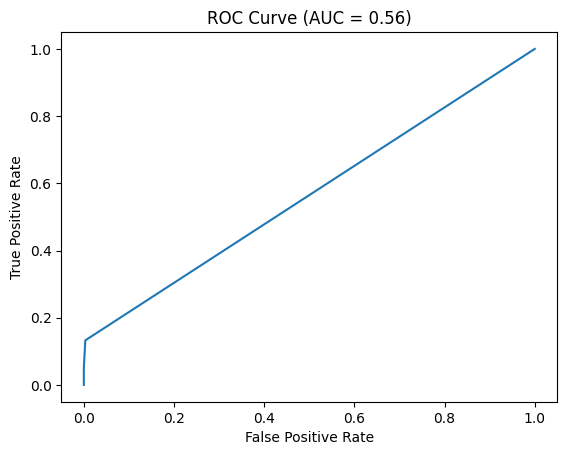

Training KNeighborsClassifier finished in 0.04 sec
----------------------------------------------------
Training GaussianNB


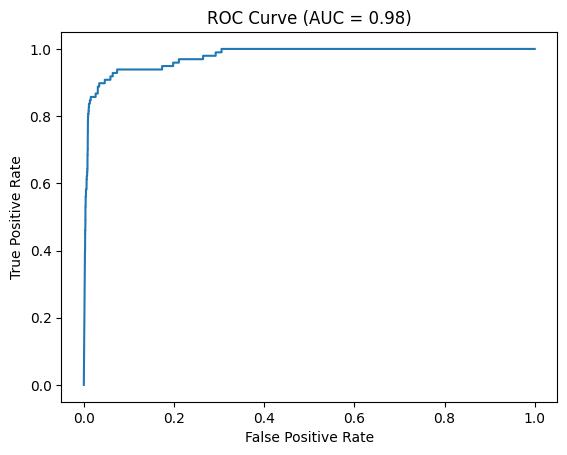

Training GaussianNB finished in 0.11 sec
----------------------------------------------------
Training GradientBoostingClassifier


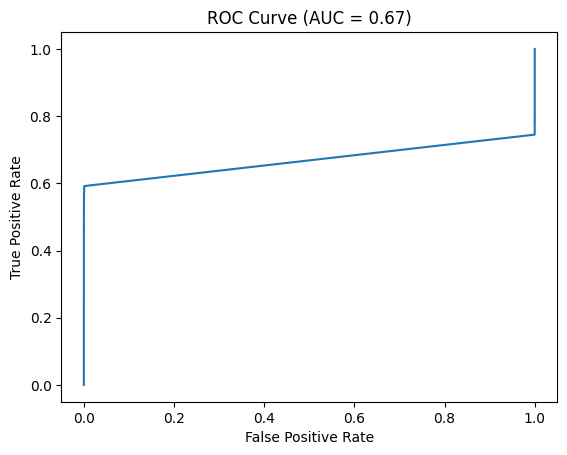

Training GradientBoostingClassifier finished in 335.40 sec
----------------------------------------------------


In [26]:
models = [ DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),GaussianNB(),
             GradientBoostingClassifier()]
re = pipeline(models, X_train, y_train, X_test, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'fpr', 'tpr', 'roc_auc'])


#**Result Analysis**

In [27]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'fpr', 'tpr', 'roc_auc'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [28]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,fpr,tpr,roc_auc
0,RandomForestClassifier,0.999596,0.962963,0.795918,0.871508,1.000000,1.000000,1.000000,1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.061224489795918366, 0.1224489795918367...",0.942540
1,DecisionTreeClassifier,0.999350,0.821053,0.795918,0.808290,1.000000,1.000000,1.000000,1.000000,"[0.0, 0.00029895891952729317, 1.0]","[0.0, 0.7959183673469388, 1.0]",0.897810
2,LogisticRegression,0.998929,0.686869,0.693878,0.690355,0.998912,0.691099,0.670051,0.680412,"[0.0, 1.758581879572313e-05, 1.758581879572313...","[0.0, 0.07142857142857142, 0.08163265306122448...",0.890916
3,GradientBoostingClassifier,0.998929,0.803279,0.500000,0.616352,0.998894,0.851485,0.436548,0.577181,"[0.0, 0.00015827236916150816, 0.00015827236916...","[0.0, 0.4387755102040816, 0.46938775510204084,...",0.668230
4,GaussianNB,0.993118,0.144928,0.612245,0.234375,0.993228,0.154124,0.649746,0.249148,"[0.0, 0.002180641530669668, 0.0022158131682611...","[0.0, 0.3673469387755102, 0.3673469387755102, ...",0.977955
5,KNeighborsClassifier,0.998332,1.000000,0.030612,0.059406,0.998473,0.979167,0.119289,0.212670,"[0.0, 0.0, 0.0, 7.034327518289252e-05, 0.00327...","[0.0, 0.01020408163265306, 0.03061224489795918...",0.564771


In [32]:
results[['Algorithm','Accuracy: Test'	,'Precision: Test','Recall: Test','F1 Score: Test']]

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test
1,RandomForestClassifier,0.999596,0.962963,0.795918,0.871508
0,DecisionTreeClassifier,0.999350,0.821053,0.795918,0.808290
2,LogisticRegression,0.998929,0.686869,0.693878,0.690355
5,GradientBoostingClassifier,0.998929,0.803279,0.500000,0.616352
4,GaussianNB,0.993118,0.144928,0.612245,0.234375
3,KNeighborsClassifier,0.998332,1.000000,0.030612,0.059406


#**Accuracy Visualization**

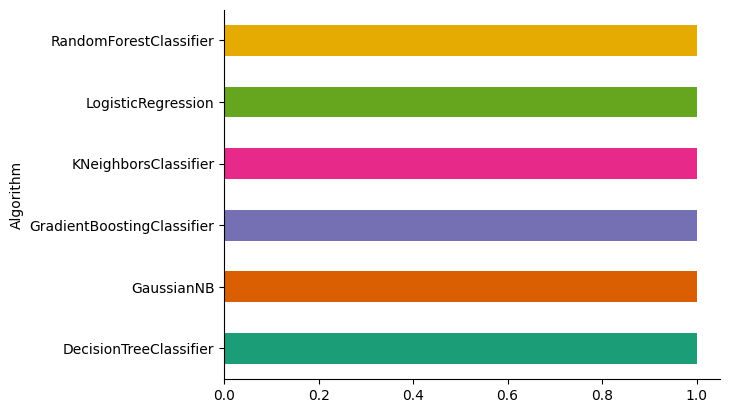

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)